<h1 style="font-size:28px; font-weight:bold; margin-bottom:0px;">Radiological Monitoring post-Windscale: 2020-2023</h1>

<h2 style="font-size:20px; font-weight:bold; margin-top:6px; margin-bottom:0px;">Connor Boyd-Lyon</h2>
<h3 style="font-size:20px; font-weight:bold; margin-top:2px; margin-bottom:0px;">MSc Data Science - The University of Birmingham</h3>
<h4 style="font-size:20px; font-weight:bold; margin-top:2px;">December 2024</h4>


## Introduction
Radiation monitoring is the process of measuring and evaluating radiation levels to ensure public and environmental safety (U.S.NRC, 2020). It involves techniques such as bioassays, alpha scans, and radiological surveys to assess radiation in various sample types including air, water, soil, sediment, equipment surfaces, and personnel (U.S.NRC, 2021). Nuclear power plants release small amounts of radioactive gases and liquids into the environment during normal operations. These discharges can affect humans, animals, plants, and marine life, making it essential to monitor and analyse emissions and surrounding environmental samples to prevent harmful effects and ensure radiation exposure stays within safe and acceptable levels.

The aim of this project is to analyse a data set released for public use at https://data.gov.uk/. The data set chosen for this project is 4 years of radiological monitoring results from various sample types and locations in the UK. The data is freely accessible here as of December 2024:

https://www.data.gov.uk/dataset/241e8f08-2b52-4835-bb6a-870f83e4c567/radiological-monitoring-data

The data set is in *.csv* format and each column represents a single variable or measurement, ensuring a consistent schema for analysis. Missing values are represented as *NaN*. For these reasons the data set is compatible for analysis with *NumPy* and *pandas*. Additionally, the data's manageable size ensures smooth in-memory processing without requiring additional processing tools.

By analysing of 4 years of radiation levels across the UK, it's possible to: 
- Identify sites of interest
- Identify sample types of interest
- Visualise year-on-year trends for locations and sample types
And importantly,
- Assess the effectiveness of existing safety measures
- Understand the short-term consequences of harnessing nuclear energy


By counting the times each nuclear site appears in the data set, focus is placed on one geographical area in the data, formerly known as Windscale, which is observed more than any other location. The observations made at Windscale, now Sellafield, are explored, finding that unpasteurised milk is the most commonly observed sample type at Sellafield and the surrounding sites, followed by various kinds of aquatic life. Two case studies are made, studying the observed radiological contaminants in milk and aquatic life at Sellafield. 


#### Libraries
Common Python libraries were used to manipulate the data and extract meaningful insights. The main libraries utilised include *Numpy* (Harris, 2020), *pandas* (McKinney, 2010), *Matplotlib* (Hunter, 2007) and *Seaborn* (Waskom, 2021).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\conno\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### The Data
In the UK radiation monitoring is performed bi-annually by the Foods Standards Agency (FSA). Samples taken from various mediums including soil, air, crops and cattle produce are tested. Tests check for the presence of up to 40 radioactive substances in solid, aqueous and chemical forms, as well as for direct emissions of beta radiation. On 7th November 2024 the FSA released it's findings publicly for the year's 2020-2023. The data doesn't specify a unit of measurement - the UK "Radioactivity in Food and the Environment" (RIFE) report gives all measurements in milliSieverts (mSv) so it's assumed this data is measured in mSv as well. For context, The Ministry of Defence (n.d) states that members of the public should not exceed 1 mSv effective dose per year, whereas the annual effective dose limit from occupational exposure is 20 mSv. 

**Note:** Effective dose is the total radiation that is absorbed and distributed over the entire body (ICRP, n.d). Effective dose is not equal to the dose ingested, however given the limited time and resources for this analysis they will be treated approximately the same.

#### Importing the Data
Each year's data is contained in a *.csv* file. The files are Windows-1252 encoded so this is given as an option when loading the data:

In [2]:
df2020 = pd.read_csv('RadiologicalMonitoringFSA2020FullResults.csv', encoding='cp1252');
df2021 = pd.read_csv('RadiologicalMonitoringFSA2021FullResults.csv', encoding='cp1252');
df2022 = pd.read_csv('RadiologicalMonitoringFSA2022FullResults.csv', encoding='cp1252');
df2023 = pd.read_csv('RadiologicalMonitoringFSA2023FullResults.csv', encoding='cp1252');

### Initial Exploration

From examining the data with the **head** or **tail** command it's clear that each row represents a single observation and each column/field represents a measurement for that given observation:

In [3]:
print("\033[1mTable 1\033[0m: The tail of the radiological monitoring data for the year 2020.".center(125))
df2020.tail()

                       Table 1: The tail of the radiological monitoring data for the year 2020.                      


,SITENAME,STATION,TRAMPFARMNAME,DESCRIPTION,DATERECEIVED,LABORATORYSAMPLENUMBER,TOTALBETA,OBT,H-3,C-14,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
890,Wylfa,Cemaes Bay,NaN,PEE - Edible winkle,21/01/2020,20-77,83±24,<25,<25,30±3.8,...,<0.09,<0.16,<0.16,<0.32,<0.07,0.22±0.10,<0.35,<0.23,<0.17,0.17±0.10
891,Wylfa,PLZ Offshore,NaN,CRE - Edible crab,05/05/2020,20-522,NaN,<25,<25,39±4.2,...,<0.10,<0.34,<0.13,ND,<0.08,0.18±0.08,<0.33,<0.18,<0.13,0.11±0.08
892,Wylfa,PLZ Offshore,NaN,LBE - European lobster,15/07/2020,20-1176,88±23,<25,<25,37±4.6,...,<0.07,<0.16,<0.13,<9.7,<0.06,0.27±0.06,<0.30,<0.13,<0.13,<0.16
893,Wylfa,PLZ Offshore,NaN,PLE - European plaice,13/08/2020,20-1354,NaN,<25,25±22,29±4.7,...,<0.09,<0.41,<0.12,ND,<0.06,0.42±0.07,<0.30,<0.18,<0.11,<0.05
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To better understand the data the column names were extracted as a list, see below. It's clear that there is a primary key, *'LABORATORYSAMPLENUMBER'*, which is unique for each observation. There are also other descriptive columns such as *'SITENAME', 'STATION', 'TRAMPFARMNAME', 'DESCRIPTION' and 'DATERECEIVED'*.

Column's 7 onwards are readings for radioactive isotopes present in the observation. *'TOTALBETA'* represents the total beta radiation emitted from the sample, and columns with isotope headings measure the concentration of that respective isotope.

In [4]:
list(df2023.columns)

['SITENAME',
 'STATION',
 'TRAMPFARMNAME',
 'DESCRIPTION',
 'DATERECEIVED',
 'LABORATORYSAMPLENUMBER',
 'TOTALBETA',
 'OBT',
 'H-3',
 'C-14',
 'C-14(N)',
 'S-35',
 'SR-90',
 'TC-99',
 'CS-137+CS-134',
 'PM-147',
 'PO-210',
 'PB-210',
 'NP-237',
 'PU-238',
 'PU-241',
 'AM-241 (chem)',
 'CM-242',
 'PU-239+240',
 'CM-243+244',
 'K-40',
 'CR-51',
 'MN-54',
 'CO-57',
 'CO-58',
 'CO-60',
 'ZN-65',
 'SE-75',
 'NB-95',
 'ZR-95',
 'RU-103',
 'RU-106',
 'AG-110M',
 'SB-124',
 'SB-125',
 'I-131 (Aq)',
 'CS-134',
 'CS-137',
 'CE-144',
 'EU-154',
 'EU-155',
 'AM-241']

## Data Cleaning
It's clear from the summary statistics that there's a lack of preciseness in the data, including NaNs and values given in ranges with '<' and '±' symbols. It's important to clean these values so that operating on them doesn't throw errors. Handling NaN values in this data is difficult, since a NaN value for an isotope measurement could mean that the reading returned 0, or that no measurement was ever made. NaNs can't be handled confidently without further context.

A function was defined, **clean_and_convert**() , which for values beginning with '<' removes the less than symbol and lowers the value by 0.01 (This returns the highest value given the restraint). For '±', the uncertainty was removed.

In [5]:
def clean_and_convert(value):
    
    if isinstance(value, str):
        
        # If the value starts with '<', delete the < and lower by 0.01
        if value.startswith('<'):
            return max(0, float(value[1:]) - 0.01) #max prevents negative readings
        
        elif '±' in value:
            #If there is a '±', return only the numeric part before it
            return float(value.split('±')[0])
        
    
    # Basic error handler
    try:
        return float(value)
    except ValueError:
        return np.nan  

The clean_and_convert() function is applied below, from column 7 onwards (where the radiological measurements begin). The result is visible in **Table 2**, with only float values present instead of value ranges.

In [6]:
df2020.iloc[:, 6:] = df2020.iloc[:, 6:].applymap(clean_and_convert)
df2021.iloc[:, 6:] = df2021.iloc[:, 6:].applymap(clean_and_convert)
df2022.iloc[:, 6:] = df2022.iloc[:, 6:].applymap(clean_and_convert)
df2023.iloc[:, 6:] = df2023.iloc[:, 6:].applymap(clean_and_convert)

print("\033[1mTable 2\033[0m: The tail of the cleaned data for the year 2020".center(125))
df2020.tail()

                               Table 2: The tail of the cleaned data for the year 2020                               


,SITENAME,STATION,TRAMPFARMNAME,DESCRIPTION,DATERECEIVED,LABORATORYSAMPLENUMBER,TOTALBETA,OBT,H-3,C-14,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
890,Wylfa,Cemaes Bay,NaN,PEE - Edible winkle,21/01/2020,20-77,83.0,24.99,24.99,30.0,...,0.08,0.15,0.15,0.31,0.06,0.22,0.34,0.22,0.16,0.17
891,Wylfa,PLZ Offshore,NaN,CRE - Edible crab,05/05/2020,20-522,NaN,24.99,24.99,39.0,...,0.09,0.33,0.12,NaN,0.07,0.18,0.32,0.17,0.12,0.11
892,Wylfa,PLZ Offshore,NaN,LBE - European lobster,15/07/2020,20-1176,88.0,24.99,24.99,37.0,...,0.06,0.15,0.12,9.69,0.05,0.27,0.29,0.12,0.12,0.15
893,Wylfa,PLZ Offshore,NaN,PLE - European plaice,13/08/2020,20-1354,NaN,24.99,25.0,29.0,...,0.08,0.4,0.11,NaN,0.05,0.42,0.29,0.17,0.1,0.04
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cleaning NaN observations
There are null rows containing no information which should be removed. The code below checks for and removes rows where *'LABORATORYSAMPLENUMBER'*, *'DESCRIPTION'* or *'SITENAME'* are NaN. 

In [7]:

df_clean_2020 = df2020.dropna(subset=['LABORATORYSAMPLENUMBER', 'SITENAME', 'DESCRIPTION']).copy()
df_clean_2021 = df2021.dropna(subset=['LABORATORYSAMPLENUMBER', 'SITENAME', 'DESCRIPTION']).copy()
df_clean_2022 = df2022.dropna(subset=['LABORATORYSAMPLENUMBER', 'SITENAME', 'DESCRIPTION']).copy()
df_clean_2023 = df2023.dropna(subset=['LABORATORYSAMPLENUMBER', 'SITENAME', 'DESCRIPTION']).copy()


print("After dropping rows where sample number, site-name or description is NaN:\n")
print(f"{df2020.shape[0]-df_clean_2020.shape[0]} row(s) were dropped from the 2020 data")
print(f"{df2021.shape[0]-df_clean_2021.shape[0]} row(s) were dropped from the 2021 data")
print(f"{df2022.shape[0]-df_clean_2022.shape[0]} row(s) were dropped from the 2022 data")
print(f"{df2023.shape[0]-df_clean_2023.shape[0]} row(s) were dropped from the 2023 data")

After dropping rows where sample number, site-name or description is NaN:

1 row(s) were dropped from the 2020 data
13 row(s) were dropped from the 2021 data
0 row(s) were dropped from the 2022 data
15 row(s) were dropped from the 2023 data


#### Checking for Consistency Among the Tables
There are 4 different data sets that are manipulated and compared in this study. It's important that the isotopes being measured for the four tables are the same so that year-on-year trends are identifiable (For example, it's not possible to compare CS-137 emissions to H-3 emissions. There must be a common field for comparison). 

The code below finds the shape of each DataFrame (DF) - it finds that the data from 2020 has an extra column. 

By comparing the sets of each year's column headings (see lines 8-9 below) the outlier is found to be isotope *I-125*. This means that in 2020 iodine-125 was tested for, but in further years it was not.

In [8]:
print(f"df2020: {df_clean_2020.shape[0]}x{df_clean_2020.shape[1]}, "
      f"df2021: {df_clean_2021.shape[0]}x{df_clean_2021.shape[1]}, "
      f"df2022: {df_clean_2022.shape[0]}x{df_clean_2022.shape[1]}, "
      f"df2023: {df_clean_2023.shape[0]}x{df_clean_2023.shape[1]}\n")
#Line 1 of the output shows df2020 has one extra column. 

#Let's find out which:
extra_columns = set(df_clean_2020.columns) - set(df_clean_2021.columns) - set(df_clean_2022.columns) - set(df_clean_2023.columns)
print(f"The additional column in df2020 is: {extra_columns}")

df2020: 894x48, df2021: 882x47, df2022: 895x47, df2023: 880x47

The additional column in df2020 is: {'I-125'}


To find why this isotope is present in only one table it's non *NaN* values were viewed, see **Table 3**. 

In [9]:
# Checking if any value in df2020's 'I-125' column is non-NaN
I125_values = df_clean_2020['I-125'].notna().sum()

print(f"\033[1mTable 3\033[0m: The {I125_values} non empty values in the I-125 field".center(125))
df_clean_2020[df_clean_2020['I-125'].notna()]

                                  Table 3: The 2 non empty values in the I-125 field                                 


,SITENAME,STATION,TRAMPFARMNAME,DESCRIPTION,DATERECEIVED,LABORATORYSAMPLENUMBER,TOTALBETA,OBT,H-3,C-14,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
117,Cardiff,NaN,CROP,POT - Potato,10/11/2020,20-2007,NaN,1.99,1.99,30.0,...,0.05,NaN,0.09,NaN,0.04,0.03,0.2,0.15,0.09,NaN
118,Cardiff,NaN,CROP,WHT - Wheat,11/11/2020,20-2020,NaN,3.39,3.39,77.0,...,0.05,NaN,0.1,NaN,0.05,0.03,0.22,0.16,0.15,NaN


It seems that the two occurances of *I-125* were in the same location and one day apart. This could mean:

- There was a high presence of I-125 in Cardiff in November 2020, or

- There was an error in data collection


Since there are no further readings of isotope *'I-125'* throughout the 4 years of data it was decided that the readings are in some way anomalous. The *I-125* column and the two affected rows were **dropped** from df2020. It's important that the rows containing *I-125* measurements were also dropped, as it's possible that all readings for those observations are skewed in some way.

In [10]:
try:
    df_clean_2020.drop('I-125', axis=1, inplace=True)
    df_clean_2020.drop(117, axis=0, inplace=True)
    df_clean_2020.drop(118, axis=0, inplace=True)
    print("Successfully dropped I-125 from df2020.")
except: print("Already dropped!")

print(f"df2020's new shape: {df_clean_2020.shape[0]}x{df_clean_2020.shape[1]}") #47 columns matches the other DF's.

Successfully dropped I-125 from df2020.
df2020's new shape: 892x47


#### Exploring the *TOTALBETA* Column

Given little-no documentation on the data-set, it's difficult to take any initial meaning from the data. A clear starting point was the first measurement column *TOTALBETA*. It was quickly discovered that, for most observations, there was no measurement for *'TOTALBETA'*. In fact, the same 21 observations **each year** were the only observations with a *'TOTALBETA'* measurement.

By extracting rows where *'TOTALBETA'* is not *NaN*, the descriptions show that all observations are from aquatic sites, given that the observation is made on marine life (**Table 4**). The most likely conclusion is that the main measurement for **aquatic** observations is the beta radiation count, whereas for **non-aquatic** observations, such as milk, crops and soil, it's preferable to measure counts of specific isotopes.

In [11]:
# Filter data for rows with TOTALBETA readings
beta_data2020 = df_clean_2020[df_clean_2020['TOTALBETA'].notna()]; 
beta_data2021 = df_clean_2021[df_clean_2021['TOTALBETA'].notna()]; 
beta_data2022 = df_clean_2022[df_clean_2022['TOTALBETA'].notna()]; 
beta_data2023 = df_clean_2023[df_clean_2023['TOTALBETA'].notna()]; 
print("Number of non NaN readings in 'TOTALBETA':")
print(f"2020: {beta_data2020.shape[0]}, 2021: {beta_data2021.shape[0]}, 2022: {beta_data2022.shape[0]}, 2023: {beta_data2023.shape[0]}")

Number of non NaN readings in 'TOTALBETA':
2020: 21, 2021: 21, 2022: 21, 2023: 21


In [12]:
year = df_clean_2020
print(f"\033[1mTable 4\033[0m: Observations in 2020 where TOTALBETA has a value. Note all observations are made on marine life, by description.".center(133))
year[year['TOTALBETA'].notna()]

  Table 4: Observations in 2020 where TOTALBETA has a value. Note all observations are made on marine life, by description.  


,SITENAME,STATION,TRAMPFARMNAME,DESCRIPTION,DATERECEIVED,LABORATORYSAMPLENUMBER,TOTALBETA,OBT,H-3,C-14,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
588,Sellafield,Drigg - Selker,NaN,PLE - European plaice,28/01/2020,20-135,87.0,24.99,24.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,Sellafield,Nethertown,NaN,PEE - Edible winkle,05/05/2020,20-520,110.0,24.99,24.99,45.0,...,0.18,1.09,0.26,NaN,0.12,2.2,1.09,0.27,0.24,9.9
596,Sellafield,Nethertown,NaN,PEE - Edible winkle,10/06/2020,20-671,150.0,24.99,24.99,54.0,...,0.19,1.99,0.25,NaN,0.11,2.8,0.71,0.25,0.22,11.0
598,Sellafield,Nethertown,NaN,PEE - Edible winkle,11/08/2020,20-1322,64.0,24.99,24.99,46.0,...,0.05,0.13,0.09,7.29,0.03,1.5,0.2,0.11,0.08,6.2
600,Sellafield,Nethertown,NaN,PEE - Edible winkle,29/09/2020,20-1667,81.0,24.99,24.99,42.0,...,0.07,0.26,0.1,NaN,0.04,1.4,0.26,0.13,0.09,6.2
605,Sellafield,Parton,NaN,PEE - Edible winkle,14/01/2020,20-34,170.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,Sellafield,Parton (N),NaN,COD - Cod,22/01/2020,20-132,180.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,Sellafield,Parton (N),NaN,CRE - Edible crab,22/01/2020,20-89,89.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,Sellafield,Parton (N),NaN,LBE - European lobster,22/01/2020,20-129,140.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,Sellafield,Ravenglass Area,NaN,PEE - Edible winkle,21/01/2020,20-79,130.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With this information, it was decided that these rows should be seperated from the rest of the table.

In [13]:
new_data2020 = df_clean_2020[df_clean_2020['TOTALBETA'].isna()]
new_data2021 = df_clean_2021[df_clean_2021['TOTALBETA'].isna()]
new_data2022 = df_clean_2022[df_clean_2022['TOTALBETA'].isna()]
new_data2023 = df_clean_2023[df_clean_2023['TOTALBETA'].isna()]

del new_data2020['TOTALBETA']
del new_data2021['TOTALBETA']
del new_data2022['TOTALBETA']
del new_data2023['TOTALBETA']
print("Successfully seperated TOTALBETA.")

Successfully seperated TOTALBETA.


### Sorting by description and location
It was decided that description and location were the best fields to index the data by because they provide a clear structure for grouping results and allow targeted analysis of specific sample types or geographic regions. Station and farm name are weak entities and depend on site-name so it was logical to group observations by site-name as well as  description.

In [14]:
descriptions = new_data2020['DESCRIPTION'].unique().tolist();
locations = new_data2020['SITENAME'].unique().tolist()
print(f"All Descriptions:\n{descriptions}\n\nAll Locations:\n{locations}")

All Descriptions:
['UMK-Unpasteurised Milk', 'BAR - Barley', 'POT - Potato', 'WHT - Wheat', 'GRS - Grass', 'OAT - Oats', 'COE - European conger eel', 'USH - Shrimp (unidentified)', 'MUL - Grey mullet', 'EOE - Elvers/Eels', 'CAB - Cabbage', 'LUC - Lucerne', 'OYG - Pacific oyster', 'SKR - Skates/rays', 'SAM - Samphire', 'LBE - European lobster', 'SIL - Silage', 'DAB - Dab', 'MUS - Blue (edible) mussel', 'COC - Common cockle', 'FLE - Flounder (European)', 'PTV - Common limpet', 'LSD - Lesser spotted dogfish', 'SHP - Shrimp/prawn', 'BWR - Ballan wrasse', 'CRE - Edible crab', 'SOL - Sole (Dover sole)', 'WHE - Common whelk', 'WHG - Whiting', 'SKL - Sea kale', 'CANTEEN MEAL', 'PEE - Edible winkle', 'BOA-Barley & Oats', 'STB - Strawberries', 'WGN - Widgeon', 'BRT - Beetroot', 'BKE - Blackberries', 'HON - Honey', 'COD - Cod', 'CAK - Cattle kidney', 'CAM - Cattle muscle', 'CLV - Cattle liver', 'EGG - Chicken eggs', 'LAM - Lamb muscle', 'LLK - Lamb liver & kidney', 'PHT - Pheasant', 'RAB - Rabbit

To find the relation, if any, between description and site name, a Multi-Index with description and site name was made. This allowed viewing of all *types* of observations made at a given site. 

**Table 5** shows that unpasteurised milk is the main observation type of interest in Aldermaston, whilst there are also 2 crop readings made each year. Further reading on Aldermaston shows that there is a nuclear weapons plant in this location, which explains the requirement for radiological monitoring in this area (AWE, n.d).

In [15]:
try:
    new_data2020 = new_data2020.set_index(['DESCRIPTION', 'SITENAME'])
    new_data2021 = new_data2021.set_index(['DESCRIPTION', 'SITENAME'])
    new_data2022 = new_data2022.set_index(['DESCRIPTION', 'SITENAME'])
    new_data2023 = new_data2023.set_index(['DESCRIPTION', 'SITENAME'])
    print("Successfully indexed")
except: print("Already indexed!\n")

Successfully indexed


In [16]:
print("\033[1mTable 5\033[0m: the 2020 samples in Aldermaston, indexed by description".center(130))
new_data2020.xs('Aldermaston', level='SITENAME')

                             Table 5: the 2020 samples in Aldermaston, indexed by description                             


,STATION,TRAMPFARMNAME,DATERECEIVED,LABORATORYSAMPLENUMBER,OBT,H-3,C-14,C-14(N),S-35,SR-90,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
UMK-Unpasteurised Milk,NaN,AD11,18/03/2020,20-425,NaN,NaN,NaN,NaN,NaN,NaN,...,0.05,NaN,0.08,NaN,0.01,0.02,0.21,0.11,0.08,NaN
UMK-Unpasteurised Milk,NaN,AD11,18/03/2020,20-426,NaN,2.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UMK-Unpasteurised Milk,NaN,AD11,08/07/2020,20-1079,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04,NaN,0.08,NaN,0.02,0.02,0.32,0.11,0.08,NaN
UMK-Unpasteurised Milk,NaN,AD11,08/07/2020,20-1080,NaN,2.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UMK-Unpasteurised Milk,NaN,AD11,30/09/2020,20-1690,NaN,8.09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UMK-Unpasteurised Milk,NaN,AD11,30/09/2020,20-1691,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07,NaN,0.11,NaN,0.04,0.04,0.32,0.17,0.14,NaN
UMK-Unpasteurised Milk,NaN,AD11,23/12/2020,20-2369,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,NaN,0.1,NaN,0.04,0.04,0.33,0.18,0.14,NaN
UMK-Unpasteurised Milk,NaN,AD11,23/12/2020,20-2370,NaN,2.39,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UMK-Unpasteurised Milk,NaN,AD12,11/06/2020,20-685,NaN,NaN,NaN,NaN,NaN,NaN,...,0.05,NaN,0.08,NaN,0.03,0.01,0.2,0.11,0.08,NaN


#### Variation in location

Each year new locations appear and old ones are removed. If a radiological incedent occurs, more readings in that area would be expected. Likewise if an area shows low or no readings multiple years in a row it might not be considered of interest in the future.

To simplify the analyses, only locations that appear in **every** year's table will be considered. This is because it's difficult to identify a trend without consistent data across all years, and excluding locations with sporadic data ensures that observed patterns are reliable and not influenced by incomplete records.

In [17]:
# Get unique locations for each year
locations_2020 = locations;
locations_2021 = new_data2021.index.get_level_values('SITENAME').unique().tolist()
locations_2022 = new_data2022.index.get_level_values('SITENAME').unique().tolist()
locations_2023 = new_data2023.index.get_level_values('SITENAME').unique().tolist()

# Find the common locations across all years (via the intersection of sets)
common_locations = set(locations_2020) & set(locations_2021) & set(locations_2022) & set(locations_2023)

print(common_locations)

{'Aldermaston', 'Harwell', 'Hinkley', 'Drigg', 'Sellafield', 'Wylfa', 'Wessex', 'East Midlands', 'Heysham', 'Devonport', 'South West', 'Trawsfynydd', 'South Mercia', 'Thames', 'Dungeness', 'Bradwell', 'Anglia', 'North East', 'Sizewell', 'Hartlepool', 'North Mercia', 'Wales', 'Vickers Shipyard', 'England', 'South East', 'Springfields', 'Derby', 'Capenhurst', 'Berkeley & Oldbury', 'Amersham', 'Northern Region', 'Northern Ireland', 'Winfrith'}


Any locations **not** included in the list above are dropped from the tables below.

In [18]:
new_data2020 = new_data2020[new_data2020.index.get_level_values('SITENAME').isin(common_locations)]
new_data2021 = new_data2021[new_data2021.index.get_level_values('SITENAME').isin(common_locations)]
new_data2022 = new_data2022[new_data2022.index.get_level_values('SITENAME').isin(common_locations)]
new_data2023 = new_data2023[new_data2023.index.get_level_values('SITENAME').isin(common_locations)]

print(f"2020: {new_data2020.index.get_level_values('SITENAME').nunique()} locations\n2021: {new_data2020.index.get_level_values('SITENAME').nunique()} locations\n2022: {new_data2020.index.get_level_values('SITENAME').nunique()} locations\n2023: {new_data2020.index.get_level_values('SITENAME').nunique()} locations")

2020: 33 locations
2021: 33 locations
2022: 33 locations
2023: 33 locations


#### Choosing a Site of Interest
To narrow the scope of the analysis one site was chosen for a case study. Having more observations makes an analysis more reliable, so the site with the most observations was chosen.

In [19]:
location_counts_2020 = new_data2020.groupby('SITENAME').size()
sorted_locs = location_counts_2020.sort_values(ascending=False)

sorted_locs.head(10)

SITENAME
Sellafield            297
Northern Ireland       71
South East             38
Drigg                  38
Wales                  30
Northern Region        26
South West             26
Anglia                 25
Berkeley & Oldbury     25
Trawsfynydd            20
dtype: int64

### Sellafield and neighbouring towns

Sellafield has the most observations by a large margin, making it a clear point of interest. Sellafield, formerly known as Windscale (Sellafield Ltd, n.d), is a nuclear site in Cumbria that manages radioactive waste and nuclear materials; it has been one of the UK's major nuclear sites since it's opening in 1947, when it was formerly known as Windscale (Sellafield Ltd, n.d). Additionally, some small towns in close vicinity of Sellafield can also be found in the tables - the towns of Drigg and Heysham as well as the Vickers Shipyard (BAE Systems, n.d) are locations all in very close proximity to Sellafield.

What makes this region of particular interest is that it's the site of the UK's worst ever nuclear accident and "one of the worst in the world, at severity level 5 of 7 of the International Nuclear Event Scale" (Black, 2011).


### The Windscale fire of 1957
On October 9th 1957 a uranium rod in Windscale's reactor no. 1 caught fire, causing nuclear fallout to pour from the reactors chimneys for three days (Russell, n.d). The damage was severe - it's estimated that 100-240 deaths have been related to cancers caused by the Windscale fire. High amounts of various isotopes were released into the environment including iodine-131, tellarium-132 and caesium-137 (Lou-rit et al., 1960). The government's response was to dilute or destroy milk produced within 300 square miles of the site (Russel, n.d). The event was largely underplayed to maintain international nuclear relations but locally Windscale's reputation was damaged beyond repair.


#### Windscale post-20th Century
After renaming the site from Windscale to Sellafield in 1981 to improve public image (Walker, 2007), the site is now under decommission since 2005. A new report published in October 2024 reveals that the decommissioning process will take until **2125** (NAO, 2024), and that until the site is decommissioned an estimated **3.3 million cubic meters** of radioactive waste exists or will be created at Sellafield.

This means that Sellafield is a site of *huge* radiological interest, and by analysing radiation over time at Sellafield and the surrounding areas it's possible to gain valuable insights into the environmental and health impacts of nuclear activity, assess the effectiveness of current monitoring and mitigation strategies, and inform future policies for managing radioactive materials and waste.

### Analysis of Results from Radiological Monitoring at Sellafield

A subset of the data was made containing observations from Sellafield, Drigg, Heysham and Vickers Shipyard - these locations were decided to be in close enough proximity to share an analysis. Site name was dropped leaving description as the index.

In [20]:
selected_locations = ['Sellafield','Drigg','Heysham','Vickers Shipyard']


#Applying the location filter
Sellafield2020 = new_data2020[new_data2020.index.get_level_values('SITENAME').isin(selected_locations)]
Sellafield2021 = new_data2021[new_data2021.index.get_level_values('SITENAME').isin(selected_locations)]
Sellafield2022 = new_data2022[new_data2022.index.get_level_values('SITENAME').isin(selected_locations)]
Sellafield2023 = new_data2023[new_data2023.index.get_level_values('SITENAME').isin(selected_locations)]

#Dropping the sitename column as these locations can be treated equally given their close proximity.
Sellafield2020 = Sellafield2020.reset_index().set_index('DESCRIPTION').drop(columns=['SITENAME'])
Sellafield2021 = Sellafield2021.reset_index().set_index('DESCRIPTION').drop(columns=['SITENAME'])
Sellafield2022 = Sellafield2022.reset_index().set_index('DESCRIPTION').drop(columns=['SITENAME'])
Sellafield2023 = Sellafield2023.reset_index().set_index('DESCRIPTION').drop(columns=['SITENAME'])

### A common observation type

The same process was repeated from determining a site of interest to find the most frequent observation type. The four years of Sellafield data were concatenated and the index counts were found. Unpasteurised milk was found to count for more than **60%** of observations and thus was chosen for analysis.

In [21]:
all_years = pd.concat([Sellafield2020, Sellafield2021, Sellafield2022, Sellafield2023], ignore_index=False)

all_years.index.value_counts()

DESCRIPTION
UMK-Unpasteurised Milk         862
PEE - Edible winkle             63
CRE - Edible crab               47
LBE - European lobster          45
MUS - Blue (edible) mussel      44
PLE - European plaice           40
COD - Cod                       36
CPR - Common prawn              24
COC - Common cockle             22
LLK - Lamb liver & kidney       22
LAM - Lamb muscle               20
NEP - Norway lobster            20
USH - Shrimp (unidentified)     16
POT - Potato                    12
CLV - Cattle liver               8
EGG - Chicken eggs               8
CAM - Cattle muscle              8
CAK - Cattle kidney              8
FLE - Flounder (European)        8
HAD - Haddock                    7
BRT - Beetroot                   7
MUP - Mussel/Edible Winkle       6
SIL - Silage                     5
DUK - Duck                       4
SAM - Samphire                   4
COW - Cockle/Winkle              4
OAT - Oats                       4
SOI - Soil                       4
MSH - Mu

## Case Study 1 - Radioactivity in Unpasteurised Milk at Sellafield 
Milk is considered a "principal pathway" for radiation contamination due to its rapid production and consumption cycle (Pitois, 2014). Unlike crops, which take months to grow and often allow isotopes with short half-lives to decay, milk provides a direct and expedited route for radionuclides to enter the human food chain. Cattle grazing on contaminated pastures can ingest radioactive particles, which are then transferred into the milk. When this milk is consumed shortly after production, the radionuclides retain their activity, posing a potential health risk. This makes monitoring milk near nuclear sites like Sellafield crucial for understanding and mitigating radiation exposure.

#### Extracting Sellafield's milk observations
Observations of *'UMK-Unpasteurised Milk'* were filtered and the *'STATION'* column was dropped (Since milk is collected from farms, not nuclear substations).

In [22]:
Sellafield_Milk_2020 = Sellafield2020.loc["UMK-Unpasteurised Milk"].drop(columns=['STATION']);
Sellafield_Milk_2021 = Sellafield2021.loc["UMK-Unpasteurised Milk"].drop(columns=['STATION']);
Sellafield_Milk_2022 = Sellafield2022.loc["UMK-Unpasteurised Milk"].drop(columns=['STATION']);
Sellafield_Milk_2023 = Sellafield2023.loc["UMK-Unpasteurised Milk"].drop(columns=['STATION']);

#### More Data Cleaning - Dropping *nulls*
It's possible that not all 40 isotopes are monitored in milk at Sellafield - the code below finds if any column's are entirely NaN (for all years). It was found that 15 isotopes **are** entirely NaN in this subset of the data, so they were dropped (as an analysis of them is not possible).

In [23]:
#Identify columns where all values are NaN
nan_2020 = set(Sellafield_Milk_2020.columns[Sellafield_Milk_2020.isna().all()])
nan_2021 = set(Sellafield_Milk_2021.columns[Sellafield_Milk_2021.isna().all()])
nan_2022 = set(Sellafield_Milk_2022.columns[Sellafield_Milk_2022.isna().all()])
nan_2023 = set(Sellafield_Milk_2023.columns[Sellafield_Milk_2023.isna().all()])

#Find columns where all values are NaN - for all years
null_cols = nan_2020 & nan_2021 & nan_2022 & nan_2023

In [24]:
try:
    if len(null_cols) != 0: 
        print(f"There are {len(null_cols)} isotopes that aren't tested for in Sellafield's milk (or always return zero readings). These are:\n\n{null_cols}")
    Sellafield_Milk_2020 = Sellafield_Milk_2020.drop(columns = null_cols)
    Sellafield_Milk_2021 = Sellafield_Milk_2021.drop(columns = null_cols)
    Sellafield_Milk_2022 = Sellafield_Milk_2022.drop(columns = null_cols)
    Sellafield_Milk_2023 = Sellafield_Milk_2023.drop(columns = null_cols)
except:
    print("\nThe NaN columns are already dropped.")

There are 15 isotopes that aren't tested for in Sellafield's milk (or always return zero readings). These are:

{'ZN-65', 'CM-242', 'MN-54', 'CM-243+244', 'NP-237', 'PO-210', 'AM-241', 'SB-124', 'PB-210', 'CO-57', 'I-131 (Aq)', 'PM-147', 'CR-51', 'C-14(N)', 'CO-58'}


#### More Data Cleaning - Setting a new index
Since all observations share a common *'DESCRIPTION'* it wasn't needed in the table anymore and could be dropped. The index was changed to laboratory sample number since it's unique for all observations.

In [25]:
try: 
    Sellafield_Milk_2020 = Sellafield_Milk_2020.reset_index().set_index("LABORATORYSAMPLENUMBER").drop(columns = "DESCRIPTION");
    Sellafield_Milk_2021 = Sellafield_Milk_2021.reset_index().set_index("LABORATORYSAMPLENUMBER").drop(columns = "DESCRIPTION");
    Sellafield_Milk_2022 = Sellafield_Milk_2022.reset_index().set_index("LABORATORYSAMPLENUMBER").drop(columns = "DESCRIPTION");
    Sellafield_Milk_2023 = Sellafield_Milk_2023.reset_index().set_index("LABORATORYSAMPLENUMBER").drop(columns = "DESCRIPTION");
    print("Successfully re-indexed")
except: print("Already indexed and dropped!")

Successfully re-indexed


### Finding the Percentage Change
The cleaned data (**Table 6**) is difficult to interpret directly due to its complexity. By calculating the average reading for each isotope across all years, the percentage change for each isotope could be determined. This approach helped identify general trends in the data and provided a clearer overview of the isotope levels over time. **Table 7** shows the average measurement of each isotope for each year. By using pandas' **pct_change()** function it was possible to find the percentage change in these averages each year (**Table 8**), determining a general trend for each isotope.

In [26]:
print("\033[1mTable 6\033[0m: The cleaned data for milk at Sellafield in 2020".center(125))
Sellafield_Milk_2020

                               Table 6: The cleaned data for milk at Sellafield in 2020                              


,TRAMPFARMNAME,DATERECEIVED,OBT,H-3,C-14,S-35,SR-90,TC-99,CS-137+CS-134,PU-238,...,ZR-95,RU-103,RU-106,AG-110M,SB-125,CS-134,CS-137,CE-144,EU-154,EU-155
LABORATORYSAMPLENUMBER,,,,,,,,,,,,,,,,,,,,,
20-104,DR02,22/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.02,0.2,0.02,0.05,0.01,0.08,0.16,0.06,0.1
20-215,DR02,12/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.04,0.37,0.05,0.11,0.03,0.13,0.38,0.13,0.09
20-433,DR02,18/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.15,0.17,0.37,0.05,0.08,0.02,0.08,0.36,0.12,0.18
20-695,DR02,15/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,0.08,0.35,0.04,0.07,0.03,0.07,0.44,0.11,0.18
20-1060,DR02,10/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04,0.03,0.21,0.02,0.05,0.02,0.22,0.17,0.06,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-1993,SE27,04/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.13,0.08,0.46,0.07,0.1,0.04,0.12,0.32,0.17,0.14
20-2116,SE27,19/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11,0.05,0.46,0.06,0.11,0.04,0.16,0.3,0.17,0.14
20-2361,SE27,23/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.08,0.27,0.04,0.07,0.03,0.11,0.17,0.1,0.08


In [27]:
#--- Finding the average for all isotopes over time ---#

data = {                               
    2020: Sellafield_Milk_2020,
    2021: Sellafield_Milk_2021,
    2022: Sellafield_Milk_2022,
    2023: Sellafield_Milk_2023,
}
annual_avgs = {}

for year, df in data.items():
    
    data_to_analyze = df.iloc[:, 2:]             # Drops the first two columns 'TRAMPFARMNAME' and 'DATERECEIVED'
    annual_avgs[year] = data_to_analyze.mean()

annual_avgs = pd.DataFrame(annual_avgs).T

In [28]:
print("\033[1mTable 7\033[0m: The average measurement of each isotope, for each year.".center(125))
annual_avgs

                           Table 7: The average measurement of each isotope, for each year.                          


,OBT,H-3,C-14,S-35,SR-90,TC-99,CS-137+CS-134,PU-238,PU-241,AM-241 (chem),...,ZR-95,RU-103,RU-106,AG-110M,SB-125,CS-134,CS-137,CE-144,EU-154,EU-155
2020,2.78375,3.037209,17.634091,0.25375,0.025314,0.001833,0.085429,0.000002,0.240833,0.000016,...,0.091043,0.054172,0.358712,0.045951,0.088466,0.031288,0.080859,0.281534,0.12773,0.117669
2021,2.54,2.687727,16.090909,0.295,0.027686,0.0,0.085071,0.000002,0.175,0.000019,...,0.072866,0.0375,0.332439,0.042195,0.083171,0.028537,0.076646,0.271585,0.122988,0.127866
2022,2.4025,2.788409,18.659091,0.215,0.030086,0.0035,0.089107,0.0,0.2775,0.000018,...,0.068773,0.043865,0.31092,0.037178,0.07816,0.028037,0.077423,0.256564,0.111104,0.120123
2023,1.630667,1.776905,19.3,0.4325,0.025286,0.0,0.078929,0.000005,0.2125,0.000034,...,0.078937,0.050562,0.307375,0.035875,0.076,0.026625,0.078125,0.244688,0.10375,0.113687


#### Visualising the Percentage Change
**Table 7** was difficult to take any meaning from as each reading requires context (a reading of 1.0 Sv in CS-137 would be catastrophic, but is quite low for C-14). Instead the percentage change for each isotope over the 4 years was compared (**Table 8**).

In [29]:
percentage_change = annual_avgs.pct_change() * 100
percentage_change = percentage_change.reset_index()

# Drop infinite values (comes as result of div by 0)
percentage_change = percentage_change.replace([float('inf'), -float('inf')]);

In [30]:
print("\033[1mTable 8\033[0m: The percentage change of each isotope, for each year.".center(125))
percentage_change

                            Table 8: The percentage change of each isotope, for each year.                           


,index,OBT,H-3,C-14,S-35,SR-90,TC-99,CS-137+CS-134,PU-238,PU-241,...,ZR-95,RU-103,RU-106,AG-110M,SB-125,CS-134,CS-137,CE-144,EU-154,EU-155
0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,-8.756174,-11.506682,-8.751128,16.256158,9.367946,-100.0,-0.418060,-17.107584,-27.335640,...,-19.965403,-30.775764,-7.324165,-8.173500,-5.985927,-8.794835,-5.20976,-3.533636,-3.712718,8.665976
2,2022,-5.413386,3.745983,15.960452,-27.118644,8.668731,-100.0,4.743913,-100.000000,58.571429,...,-5.616962,16.973415,-6.473000,-11.890493,-6.025224,-1.751350,1.01371,-5.530839,-9.662349,-6.055686
3,2023,-32.126257,-36.275320,3.434836,101.162791,-15.954416,-100.0,-11.422846,-100.000000,-23.423423,...,14.779773,15.268357,-1.140243,-3.504538,-2.762951,-5.035558,0.90630,-4.629214,-6.619271,-5.357188


### Visualising the Sellafield Milk Data
Now the isotopes were in some way normalised, they were plotted to visualise trends and outliers. **Figure 1** visualises the percentage change over time for each isotope found in milk at Sellafield.

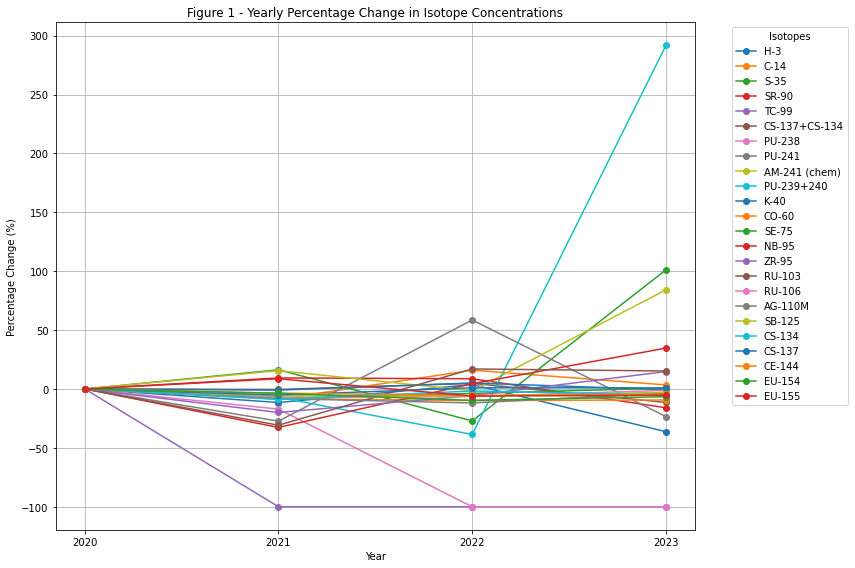

In [31]:
percentage_change = percentage_change.fillna(0) # The first year (2020) is 0 as it has no percentage change. 


# Plotting the percentage change for each isotope
plt.figure(figsize=(12, 8))
for isotope in percentage_change.columns[2:]:  # Skip the first column ('index')
    plt.plot(list(percentage_change['index']), list(percentage_change[isotope]), marker='o', label=isotope)

      
# Fancy stuff
plt.title('Figure 1 - Yearly Percentage Change in Isotope Concentrations')
plt.xticks(range(2020, 2024))
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Isotopes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Outlier - Plutonium 239 & Plutonium 240
The isotopes of plutonium are commonly perceived as the most toxic substance known to man (Mettler Jr. and Upton, 2008). The plot shows that 'PU-239+PU-240' levels almost tripled in 2023. Of plutonium's 15 isotopes isotopes plutonium-239 has generated "the most biological concern". However, the major risk of plutonium is through inhalation, rather than ingestion (Centers for Disease Control and Prevention, 2021). Ingestion of plutonium particles is not a large threat to humans, since the stomach cannot absorb plutonium easily and it passes through our bodies relatively quickly.

Despite this, it's still significant that plutonium levels tripled in milk samples for the year 2023. It's likely that these readings are a result of increased plutonium levels in other mediums, such as the air, soil or crops which cows were consuming before producing the milk. If plutonium levels are increasing in the air or soil around Sellafield this poses a health risk to people living in the area.

**Figure 2** checks the levels of plutonium in soil vs all other mediums over time. Despite soil having the highest concentrations of plutonium the figure shows that there is no significant upward trend of PU-239+240 levels found in soil at Sellafield. The increase in 2023 doesn't match the ~300% increase in PU-239+240 found in milk that year. These contradictory readings suggest that cows are not eating from the same pasture where soil is tested.

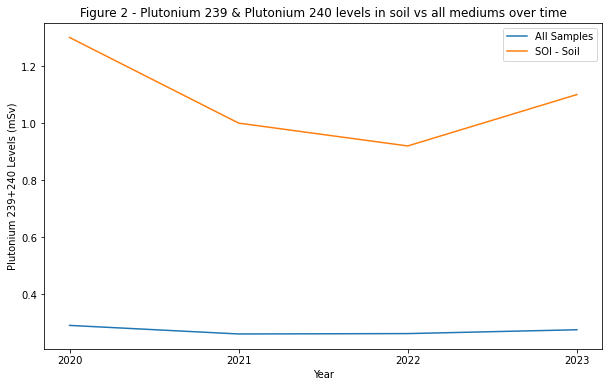

In [32]:
# Data
All = [Sellafield2020['PU-239+240'].mean(),
         Sellafield2021['PU-239+240'].mean(),
         Sellafield2022['PU-239+240'].mean(),
         Sellafield2023['PU-239+240'].mean()]

Soil = [Sellafield2020['PU-239+240'].loc['SOI - Soil'],
         Sellafield2021['PU-239+240'].loc['SOI - Soil'],
         Sellafield2022['PU-239+240'].loc['SOI - Soil'],
         Sellafield2023['PU-239+240'].loc['SOI - Soil']]

years = [2020, 2021, 2022, 2023]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, All, label='All Samples')
plt.plot(years,Soil, label='SOI - Soil')


# Plotting options
plt.title("Figure 2 - Plutonium 239 & Plutonium 240 levels in soil vs all mediums over time")
plt.xlabel('Year')
plt.ylabel('Plutonium 239+240 Levels (mSv)')
plt.xticks(range(2020, 2024))
plt.legend()
plt.show()


## Case Study 2 - Marine Life at Sellafield
After milk, the second most observed sample type is the various forms of marine life that live in the sea at Sellafield. Note that the current Sellafield subsets don't include the data in **Table 4** from the cleaning process, where *TOTALBETA* is used as the primary measurement. 

In part 1 of this case study, **Table 9** was created as a subset of the Sellafield data, containing only observations made on marine life. This data was analysed similarly to the milk data in Case Study 1. For part 2 of the case study **Table 4** was re-defined and analysed, finding the trend in total beta radiation found in aquatic life at Sellafield. For both analyses the different sample types of marine life were treated the same to simplify the analysis.

### Case Study 2, Part 1: Isotope Concentrations

In [33]:
# List of marine life sample types
marine_life_samples = [
    'PEE - Edible winkle', 'CRE - Edible crab', 'LBE - European lobster', 'MUS - Blue (edible) mussel',
    'PLE - European plaice', 'COD - Cod', 'CPR - Common prawn', 'COC - Common cockle', 
    'NEP - Norway lobster', 'FLE - Flounder (European)', 'HAD - Haddock', 'MUP - Mussel/Edible Winkle', 
    'COW - Cockle/Winkle', 'RFW - Round fish - white', 'CCM -Cockle/Mussel', 'PER - Periwinkles (NEI)', 
    'WHG - Whiting'
]

# Filter the dataset for marine life samples for each year
Aquatic_2020 = Sellafield2020.loc[Sellafield2020.index.isin(marine_life_samples)]
Aquatic_2021 = Sellafield2021.loc[Sellafield2021.index.isin(marine_life_samples)]
Aquatic_2022 = Sellafield2022.loc[Sellafield2022.index.isin(marine_life_samples)]
Aquatic_2023 = Sellafield2023.loc[Sellafield2023.index.isin(marine_life_samples)]

In [34]:
print("\033[1mTable 9\033[0m: The marine life observations at Sellafield in 2020, that were NOT measured by TOTALBETA".center(130))
Aquatic_2020

             Table 9: The marine life observations at Sellafield in 2020, that were NOT measured by TOTALBETA             


,STATION,TRAMPFARMNAME,DATERECEIVED,LABORATORYSAMPLENUMBER,OBT,H-3,C-14,C-14(N),S-35,SR-90,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
FLE - Flounder (European),Morecambe,NaN,18/02/2020,20-238,24.99,24.99,60.0,20.0,NaN,0.015,...,0.05,0.11,0.11,2.29,0.03,2.1,0.26,0.13,0.12,0.13
FLE - Flounder (European),Morecambe,NaN,15/07/2020,20-1175,24.99,24.99,42.0,18.0,NaN,0.021,...,0.18,0.87,0.26,NaN,0.11,2.4,1.39,0.29,0.24,0.44
PLE - European plaice,Drigg - Selker,NaN,28/01/2020,20-136,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLE - European plaice,Drigg - Selker,NaN,19/02/2020,20-134,NaN,NaN,54.0,15.0,NaN,NaN,...,0.08,0.5,0.1,NaN,0.02,1.2,0.31,0.15,0.1,0.1
PLE - European plaice,Drigg - Selker,NaN,18/08/2020,20-1370,NaN,NaN,74.0,21.0,NaN,NaN,...,0.08,0.52,0.11,NaN,0.04,1.1,0.29,0.17,0.1,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUS - Blue (edible) mussel,Whitehaven Harbour,NaN,24/06/2020,20-1022,NaN,NaN,47.0,20.0,NaN,NaN,...,0.25,2.39,0.33,NaN,0.07,1.5,0.91,0.61,0.29,8.2
MUS - Blue (edible) mussel,Whitehaven Harbour,NaN,24/06/2020,20-1024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUS - Blue (edible) mussel,Whitehaven Harbour,NaN,12/08/2020,20-1324,NaN,NaN,37.0,20.0,NaN,NaN,...,0.07,0.14,0.14,0.17,0.1,0.75,0.32,0.17,0.15,5.3


#### More Data Cleaning
The code below:
- Resets the description index and drops it
- Drops 'TRAMPFARMNAME' as it's empty (marine life is not found at farms)
- Drops columns that are null for all observations (some isotopes may not be measured for in aquatic organisms)

An alternative method of dating observations was considered, see the commented code segments. By converting the 'DATERECEIVED' column to show only the year it would be possible to use 'DATERECEIVED' as an index. This approach seemed reasonable but wasn't adopted, since a working solution had already been found in Case Study 1. 

In [35]:
try:
    Aquatic_2020 = Aquatic_2020.reset_index().drop(columns = ['DESCRIPTION','TRAMPFARMNAME'])
    #Aquatic_2020['DATERECEIVED'] = pd.to_datetime(Aquatic_2020['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
    Aquatic_2021 = Aquatic_2021.reset_index().drop(columns = ['DESCRIPTION','TRAMPFARMNAME'])
    #Aquatic_2021['DATERECEIVED'] = pd.to_datetime(Aquatic_2021['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
    Aquatic_2022 = Aquatic_2022.reset_index().drop(columns = ['DESCRIPTION','TRAMPFARMNAME'])
    #Aquatic_2022['DATERECEIVED'] = pd.to_datetime(Aquatic_2022['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
    Aquatic_2023 = Aquatic_2023.reset_index().drop(columns = ['DESCRIPTION','TRAMPFARMNAME'])
    #Aquatic_2023['DATERECEIVED'] = pd.to_datetime(Aquatic_2023['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
except: print("Already converted")

In [36]:
#Identify columns where all values are NaN
nan_2020 = set(Aquatic_2020.columns[Aquatic_2020.isna().all()])
nan_2021 = set(Aquatic_2021.columns[Aquatic_2021.isna().all()])
nan_2022 = set(Aquatic_2022.columns[Aquatic_2022.isna().all()])
nan_2023 = set(Aquatic_2023.columns[Aquatic_2023.isna().all()])

#Find columns where all values are NaN - for all years
null_cols = nan_2020 & nan_2021 & nan_2022 & nan_2023

In [37]:
try:
    if len(null_cols) != 0: 
        print(f"There are {len(null_cols)} isotopes that aren't tested for in marine life. The dropped isotopes are:\n\n{null_cols}")
    Aquatic_2020 = Aquatic_2020.drop(columns = null_cols)
    Aquatic_2021 = Aquatic_2021.drop(columns = null_cols)
    Aquatic_2022 = Aquatic_2022.drop(columns = null_cols)
    Aquatic_2023 = Aquatic_2023.drop(columns = null_cols)
except:
    print("\nThe NaN columns are already dropped.")

There are 2 isotopes that aren't tested for in marine life. The dropped isotopes are:

{'CS-137+CS-134', 'S-35'}


In [38]:
print("\033[1mTable 10\033[0m: The result of cleaning on Table 9".center(125))
Aquatic_2020

                                     Table 10: The result of cleaning on Table 9                                     


,STATION,DATERECEIVED,LABORATORYSAMPLENUMBER,OBT,H-3,C-14,C-14(N),SR-90,TC-99,PM-147,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
0,Morecambe,18/02/2020,20-238,24.99,24.99,60.0,20.0,0.015,0.14,NaN,...,0.05,0.11,0.11,2.29,0.03,2.1,0.26,0.13,0.12,0.13
1,Morecambe,15/07/2020,20-1175,24.99,24.99,42.0,18.0,0.021,0.22,NaN,...,0.18,0.87,0.26,NaN,0.11,2.4,1.39,0.29,0.24,0.44
2,Drigg - Selker,28/01/2020,20-136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Drigg - Selker,19/02/2020,20-134,NaN,NaN,54.0,15.0,NaN,NaN,NaN,...,0.08,0.5,0.1,NaN,0.02,1.2,0.31,0.15,0.1,0.1
4,Drigg - Selker,18/08/2020,20-1370,NaN,NaN,74.0,21.0,NaN,NaN,NaN,...,0.08,0.52,0.11,NaN,0.04,1.1,0.29,0.17,0.1,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Whitehaven Harbour,24/06/2020,20-1022,NaN,NaN,47.0,20.0,NaN,NaN,NaN,...,0.25,2.39,0.33,NaN,0.07,1.5,0.91,0.61,0.29,8.2
90,Whitehaven Harbour,24/06/2020,20-1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Whitehaven Harbour,12/08/2020,20-1324,NaN,NaN,37.0,20.0,NaN,NaN,NaN,...,0.07,0.14,0.14,0.17,0.1,0.75,0.32,0.17,0.15,5.3
92,Whitehaven Harbour,12/08/2020,20-1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data_aquatic = {                               
    2020: Aquatic_2020,
    2021: Aquatic_2021,
    2022: Aquatic_2022,
    2023: Aquatic_2023,
}
annual_avgs_aquatic = {}

for year, df in data_aquatic.items():
    
    data_filter = df.iloc[:, 3:]             # Drops the first three columns
    annual_avgs_aquatic[year] = data_filter.mean()

annual_avgs_aquatic = pd.DataFrame(annual_avgs_aquatic).T; 

In [40]:
print("\033[1mTable 11\033[0m: The average measurement of each isotope, for each year".center(125))
annual_avgs_aquatic

                           Table 11: The average measurement of each isotope, for each year                          


,OBT,H-3,C-14,C-14(N),SR-90,TC-99,PM-147,PO-210,PB-210,NP-237,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
2020,40.495,40.161667,57.366667,20.133333,0.091765,13.144706,0.2,12.668529,0.490167,0.00675,...,0.084211,0.347105,0.148421,2.406,0.055789,1.276579,0.376316,0.186053,0.140263,1.589737
2021,27.325,30.325,46.266667,20.733333,0.115118,7.650235,0.205,12.235,0.6904,0.0092,...,0.066842,0.192105,0.116316,3.478571,0.052895,1.083684,0.292895,0.158947,0.123158,1.617632
2022,25.493333,26.658333,45.933333,22.066667,0.092059,9.072941,0.26,14.441471,0.410923,0.01205,...,0.062632,0.203947,0.109474,3.211176,0.053158,1.005,0.298421,0.153158,0.122105,1.466053
2023,24.99,26.326667,37.4,20.766667,0.074529,6.191176,0.328,15.469118,0.48515,0.0041,...,0.059211,0.225263,0.102895,14.979167,0.043158,0.980263,0.282368,0.134737,0.111316,1.548947


In [41]:
percentage_change_aquatic = annual_avgs_aquatic.pct_change() * 100
percentage_change_aquatic = percentage_change_aquatic.reset_index()

# Drop infinite values (comes as result of div by 0)
percentage_change_aquatic = percentage_change_aquatic.replace([float('inf'), -float('inf')]);

In [42]:
print("\033[1mTable 12\033[0m: The percentage change of each isotope, for each year.".center(125))
percentage_change_aquatic

                           Table 12: The percentage change of each isotope, for each year.                           


,index,OBT,H-3,C-14,C-14(N),SR-90,TC-99,PM-147,PO-210,PB-210,...,AG-110M,SB-124,SB-125,I-131 (Aq),CS-134,CS-137,CE-144,EU-154,EU-155,AM-241
0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,-32.522534,-24.492675,-19.349216,2.980132,25.448718,-41.799875,2.500000,-3.422097,40.850051,...,-20.625000,-44.655042,-21.631206,44.579029,-5.188679,-15.110287,-22.167832,-14.568600,-12.195122,1.754676
2,2022,-6.703263,-12.091234,-0.720461,6.430868,-20.030659,18.596891,26.829268,18.034087,-40.480398,...,-6.299213,6.164384,-5.882353,-7.686919,0.497512,-7.260806,1.886792,-3.642384,-0.854701,-9.370425
3,2023,-1.974372,-1.244139,-18.577649,-5.891239,-19.041534,-31.762189,26.153846,7.115945,18.063386,...,-5.462185,10.451613,-6.009615,366.469744,-18.811881,-2.461377,-5.379189,-12.027491,-8.836207,5.654281


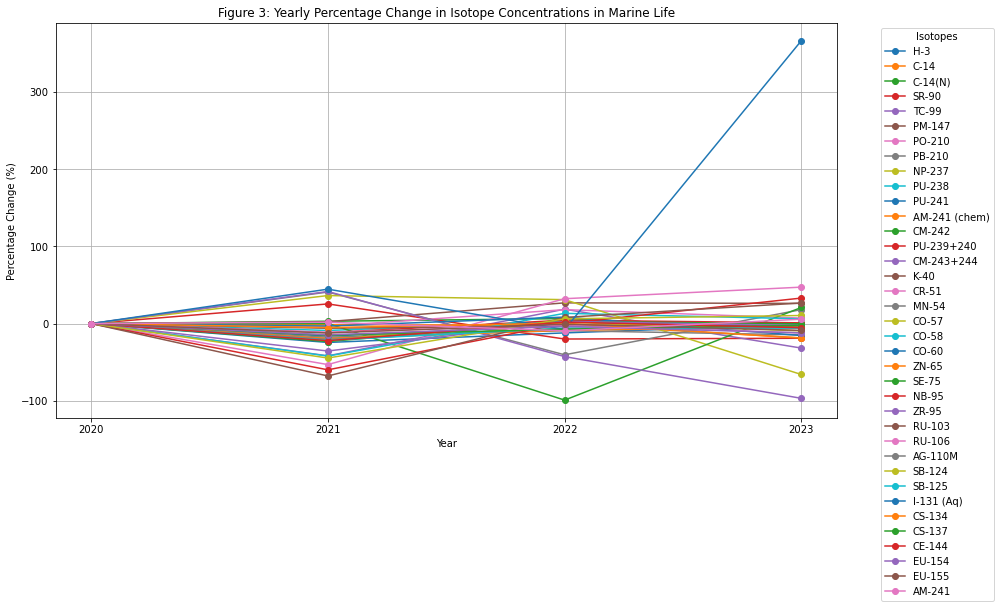

In [43]:
percentage_change_aquatic = percentage_change_aquatic.fillna(0) # The first year (2020) is 0 as it has no percentage change. 


# Plotting the percentage change for each isotope
plt.figure(figsize=(14, 8))
for isotope in percentage_change_aquatic.columns[2:]:  # Skip the first column ('index')
    plt.plot(list(percentage_change_aquatic['index']), list(percentage_change_aquatic[isotope]), marker='o', label=isotope)

      
# Fancy stuff
plt.title('Figure 3: Yearly Percentage Change in Isotope Concentrations in Marine Life')
plt.xticks(range(2020, 2024))
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Isotopes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Outlier - Iodine-131
In 2023 average levels of Iodine-131 increased almost four-fold. Iodine-131 is an artificial radionuclide (Liu et al, 2021) which is highly toxic to humans. The thyroid gland absorbs iodine for hormone production, but cannot tell the difference between stable iodine and radioactive isotopes of iodine. If ingested, there is an increased risk of cancer. Iodine-131 has a half-life of only 8 days (EPA, 2024).

Given that iodine-131 is artificial (it cannot be found naturally) and that it has a half-life of only 8 days, it's clear that the increase in this radionuclide is directly caused by ongoing activity at Sellafield.

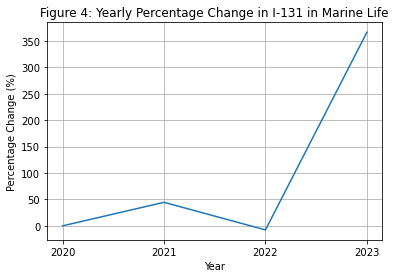

In [44]:
plt.plot([2020,2021,2022,2023], list(percentage_change_aquatic['I-131 (Aq)']))
plt.title('Figure 4: Yearly Percentage Change in I-131 in Marine Life')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(range(2020, 2024))
plt.grid(True)
plt.show()

### Case Study 2, Part 2: TOTALBETA
The *TOTALBETA* values for the observations that were dropped initially are re-defined below:

- Only observations at Sellafield are taken into account
- Only the *TOTALBETA* and *DATERECEIVED* columns are extracted
- The date received column is converted into only the year (eg. 20/11/2023 --> 2023)
- The data is concatenated, see **Table 13**

In [45]:
beta_2020 = beta_data2020[beta_data2020["SITENAME"] == "Sellafield"][["TOTALBETA","DATERECEIVED"]]
beta_2020['DATERECEIVED'] = pd.to_datetime(beta_2020['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
beta_2021 = beta_data2021[beta_data2021["SITENAME"] == "Sellafield"][["TOTALBETA","DATERECEIVED"]]
beta_2021['DATERECEIVED'] = pd.to_datetime(beta_2021['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
beta_2022 = beta_data2022[beta_data2022["SITENAME"] == "Sellafield"][["TOTALBETA","DATERECEIVED"]]
beta_2022['DATERECEIVED'] = pd.to_datetime(beta_2022['DATERECEIVED'], format='%d/%m/%Y').dt.year
    
beta_2023 = beta_data2023[beta_data2023["SITENAME"] == "Sellafield"][["TOTALBETA","DATERECEIVED"]]
beta_2023['DATERECEIVED'] = pd.to_datetime(beta_2023['DATERECEIVED'], format='%d/%m/%Y').dt.year

beta_data = pd.concat([beta_2020,beta_2021,beta_2022,beta_2023])
print("\033[1mTable 13\033[0m: The Total Beta radiation emitted per sample in 2020")
beta_data

Table 13: The Total Beta radiation emitted per sample in 2020


,TOTALBETA,DATERECEIVED
588,87.0,2020
594,110.0,2020
596,150.0,2020
598,64.0,2020
600,81.0,2020
...,...,...
648,58.0,2023
655,130.0,2023
661,83.0,2023
666,90.0,2023


### Visualising the Sellafield Beta Emissions in Aquatic Life
With the data from **Table 13** a box plot was created to show the distribution of beta radiation readings over the four years. There is a negative trend across the four distributions, with the median decreasing significantly between 2020-2023. This is representative of the decommisioning efforts at Sellafield, however it also highlights why the decommissioning process is taking so long - (add a trend line and find when it will be zero!!)

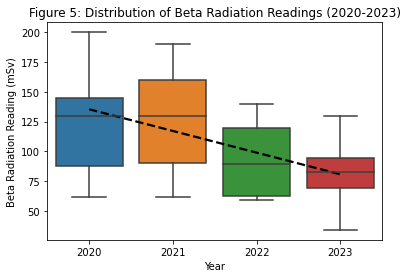

In [46]:
# Box plot
sns.boxplot(x='DATERECEIVED', y='TOTALBETA', data=beta_data)


# Trend line using the medians
median_data = beta_data.groupby('DATERECEIVED')['TOTALBETA'].median().reset_index()
median_data['DATERECEIVED'] = range(len(median_data))
sns.regplot(
    x=median_data['DATERECEIVED'],
    y=median_data['TOTALBETA'],
    ci=None,
    scatter=False,
    color='black',
    line_kws={'ls':'--'}
)


# Plotting options
plt.title('Figure 5: Distribution of Beta Radiation Readings (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Beta Radiation Reading (mSv)')
plt.show()

The trend in **Figure 5** shows that the year-on-year emissions of beta radiation are decreasing in organisms living in the waters surrounding Sellafield. The trend line was calculated using the median values for each year. The trend indicates that the decommissioning process is thus far a success.

Whilst the trend line is a good indicator of good progress for the years described in this report, it shouldn't be extrapolated as a linear model beyond the period's analysed in this report. This is because the true model is likely non-linear. By looking at a limited range of years, such as 2020-2023, a non-linear curve can appear approximately linear; if the analysis extended to cover a longer time span, such as from 2000 to 2023, the data could reveal a more complex shape to represent decay.

# Conclusion
This report presents an analysis of four years of radiological monitoring data collected from various locations around the UK. The report focuses on Sellafield, a nuclear site undergoing decommissioning. The data was cleaned; inconsistencies and missing values were treated so that the data set was optimal for analysis. Exploratory Data Analysis was then performed to find an area of interest; Sellafield was identified as the most monitored site, which justified its selection as the focal point of this study. Furthermore, certain sample types were observed more often than others at Sellafield. Unpasteurised milk and various marine life were identified as high-frequency observations. Pandas and Numpy was used to filter and aggregate the data, so that clear visualisations could be made identifying outliers and trends within the data. 

In the case study on milk, isotopes of plutonium were found to increase three-fold in the year 2023. This was then compared with other sample types at Sellafield which did not reciprocate the same results. There is a possibility that cattle feed was contaminated that year, among other conclusions. The case study on marine life was divided into two parts, based on the presence of the *TOTALBETA* field. First, for readings without a measurement of *TOTALBETA*, the same process was repeated as in the milk case study, finding that iodine-131 concentration had quadrupled in the year 2023. Iodine-131 is an artficial isotope, which confirms that it came as a product of the ongoing activities at Sellafield. Secondly, the total beta radiation emissions were visualised. A box plot was made to understand both the median radiation levels over time as well as the distribution of radiation across samples. The box plot found that radiation levels are going down, and variance is decreasing, which means that the decommissioning process at Sellafield is currently going as planned.  

The analyses of these case studies revealed important insights into the levels of radiation in the ecosystems surrounding Sellafield and highlighted the progress of the undergoing decommissioning efforts. Recommendations for this analysis are to continue carefully monitoring the decommissioning process; the trends found are indicative of successful remediation efforts, although further investigation over a longer period is necessary to confirm the long-term effectiveness of these efforts. Additionally, it's important to ensure in the near future that the 2023 outliers are outliers for certain, not the beginning of an upwards trend in radionuclide emissions at Sellafield.


### Limitations and Challenges
The analyses in this report were constrained by several factors. Firstly, the study was conducted without expertise in radiology, which limited the depth of the analysis and quality of interpretation of the results. Data Scientists traditionally work *alongside* experts in the relevant domain, who assist with providing context and explain the aims for analysis.

Secondly, a significant challenge encountered was the lack of documentation detailing the operational procedures and methods used to collect the data. This gap meant there was no clear understanding of the units of measurement for certain isotopes, which could have potentially invalidated the data. Instead of disregarding the data as unsuitable for analysis, a creative approach was adopted by comparing isotopes using percentage changes over time. This allowed for meaningful insights into the trends hidden in the data, even in the absence of precise units. This approach was particularly useful in tracking anomalies, such as the sudden increases in specific isotopes in 2023, without relying on a standard unit of measurement. Through this method, I was able to successfully perform the analysis and draw conclusions from the data, despite the limitations, ensuring the report remained relevant and informative.

With more time & resources, a predictive model would have been made to estimate the time required for full decommissioning at Sellafield. Such a model would have been valuable in estimating when radiation levels for all major isotopes might reach normal levels, offering a timeline for progress at the site.

# References

United States Nuclear Regulatory Commission (U.S.NRC), (2021). "Glossary: Monitoring of radiation". Available at: https://www.nrc.gov/reading-rm/basic-ref/glossary/monitoring-of-radiation.html

United States Nuclear Regulatory Commission (U.S.NRC), (2020). "How the NRC Protects You: Radiation Monitoring at Nuclear Power Plants". Available at: https://www.nrc.gov/about-nrc/radiation/protects-you/radiation-monitoring.html

Harris, C.R., Millman, K.J., van der Walt, S.J. et al., (2020). "Array programming with NumPy". *Nature 585*, pp. 357–362. DOI: 10.1038/s41586-020-2649-2.

McKinney, W. et al., (2010). "Data structures for statistical computing in python". In Proceedings of the 9th Python in Science Conference. pp. 51–56.

Hunter, J.D., (2007). 'Matplotlib: A 2D graphics environment'. Computing in Science & Engineering 9(3), pp. 90–95. doi: 10.1109/MCSE.2007.55.

Waskom, M.L., 2021. seaborn: statistical data visualization. Journal of Open Source Software, 6(60), p.3021. Available at: https://doi.org/10.21105/joss.03021 (Accessed 4 December 2024).

AWE, (no date). "Locations". Available at: https://www.awe.co.uk/about-us/our-locations/ (Accessed 30 Nov. 2024).

Sellafield Ltd, (no date). "What is Sellafield?". *Cleaning up our nuclear past: faster, safer and sooner*. Available at: https://nda.blog.gov.uk/what-is-sellafield/ (Accessed 28 Nov. 2024).

BAE Systems, (no date). "Vickers-Shipbuilding". *Heritage*. Available at: https://www.baesystems.com/en-uk/heritage/vickers-shipbuilding (Accessed 28 Nov. 2024).

Penney, W., Schonland, B.F.J., Kay, J.M., Diamond, J., and Peirson, D.E.H., (2017). Report on the accident at Windscale No. 1 Pile on 10 October 1957. Journal of Radiological Protection, 37(3), pp.780-796. Available at: https://doi.org/10.1088/1361-6498/aa7788 (Accessed 28 Nov. 2024).

Black, R., (2011). Fukushima - disaster or distraction? BBC News. 18 March. Available at: https://www.bbc.co.uk/news/science-environment-12789749 (Accessed 28 Nov. 2024).

Russell, P., (no date). 'Britain’s Chernobyl?': The Windscale fire and what it reveals about Cold War-era governments’ attitudes towards risk. Available at: https://www.keele.ac.uk/extinction/controversy/windscale/ (Accessed 28 Nov. 2024).

Walker, P., (2007). 'From Windscale to Sellafield: a history of controversy'. Available at: https://www.theguardian.com/environment/2007/apr/18/energy.nuclearindustry (Accessed: 1 December 2024).

National Audit Office (NAO), (2024). 'Decommissioning Sellafield: managing risks from the nuclear legacy'. Available at: https://www.nao.org.uk/wp-content/uploads/2024/10/decommissioning-sellafield-managing-risks-from-the-nuclear-legacy-summary.pdf (Accessed: 1 December 2024).

Lou-rit, J.F., Marley, W.G. and Russell, R.S., (1960). Appendix H: The Nuclear Reactor Accident at Windscale-October, 1957: Environmental Aspects. Available at: https://inis.iaea.org/collection/NCLCollectionStore/_Public/37/004/37004427.pdf (Accessed: 28 Nov. 2024).

Arfken, G.B., Griffing, D.F., Kelly, D.C. and Priest, J., (1984). Chapter 43 - Nuclear structure and nuclear technology. In: *University Physics*. Academic Press, pp. 842-869. https://doi.org/10.1016/B978-0-12-059860-1.50048-5.

Pitois, A., (2014). 'Checking for Radionuclides in Dairy Food Products'. International Atomic Energy Agency (IAEA). Available here: https://www.iaea.org/newscenter/news/checking-radionuclides-dairy-food-products (Accessed: 1 December 2024).

Environment Agency, Food Standards Agency, and Natural Resources Wales, (2023). 'Radioactivity in Food and the Environment: RIFE-29 Report'. Available at: https://www.gov.uk/government/publications/radioactivity-in-food-and-the-environment-rife-reports/rife-29-radioactivity-in-food-and-the-environment-2023#foreword (Accessed: 1 December 2024).

Ministry of Defence, (no date). 'JSP 392: Radiation Protection Part 2, Chapter 4 (Point 19)'. Available at: https://assets.publishing.service.gov.uk/media/6011a0f2d3bf7f05bdaef433/JSP392_Part2_Chap4.pdf (Accessed: 1 December 2024).

International Commission on Radiological Protection (ICRP), (no date). 'Absorbed, Equivalent, and Effective Dose'. Available at: http://icrpaedia.org/Absorbed,_Equivalent,_and_Effective_Dose (Accessed: 2 December 2024).

Mettler Jr., F.A. and Upton, A.C., 2008. 'Uranium, Plutonium, and Radium'. In: Medical Effects of Ionizing Radiation. 3rd ed. Elsevier. Available at: https://www.sciencedirect.com/topics/medicine-and-dentistry/plutonium-240 (Accessed: 2 December 2024).

Centers for Disease Control and Prevention (CDC), 2021. 'Plutonium'. Available at: https://www.cdc.gov/radiation-emergencies/hcp/isotopes/plutonium.html#:~:text=This%20exposes%20the%20blood%20and,a%20serious%20threat%20to%20humans (Accessed: 2 December 2024).

Liu, H., Zhuo, W., et al. (2021). 'A progress review on methods for in vivo measurement of 131I in thyroids by using portable gamma spectrometers', Radiation Medicine and Protection. Available at: https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/iodine-131 (Accessed: 3 December 2024).